<a href="https://colab.research.google.com/github/ghost271296/CapacityCredit.jl/blob/master/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip --version


pip 21.1.3 from /usr/local/lib/python3.7/dist-packages/pip (python 3.7)


In [ ]:
pip install psrmodels==1.2.7

In [ ]:
pip install Deprecated

In [ ]:
######   read data as a whole year
import numpy as np

ListofCap=[]
ListofAva=[]

text_file = open("GB_anonymised_conv.txt", "r")
# text_file = open("I_conv.txt", "r")

for line in text_file:
    if (len(line.split())>=3):
        ListofCap.append(float(line.split()[1]))
        ListofAva.append(float(line.split()[2]))

ListofCap=np.array(ListofCap)
ListofAva=np.array(ListofAva)
        

GBdem=[]
GBwind=[]
Idem=[]
Iwind=[]
# GBdem=np.array([[28372.7202573247,28372.7202573247]])
# GBwind=np.array([[700.875,700.875]])
######   read data
text_file = open("InterconnectionData_Rescaled.txt", "r")

for line in text_file:
#    if (str(line.split()[1]).startswith('"2008')):
    if (len(line.split())>=7):
        GBdem.append(float(line.split()[3]))
        GBwind.append(float(line.split()[5]))
        Idem.append(float(line.split()[4]))
        Iwind.append(float(line.split()[6]))

GBdem=np.array(GBdem)
GBwind=np.array(GBwind)
Idem=np.array(Idem)
Iwind=np.array(Iwind)
print(GBdem)
print(Idem)
print(ListofCap)

[28372.72025732 27053.93985423 25711.9838577  ... 34494.52422018
 31811.47559633 29294.59027523]
[4759.07755373 4366.75539076 4083.8786473  ... 5663.71140072 5230.62609173
 4985.38775341]
[540. 540. 610. 610. 620. 580. 590. 590. 450. 450. 600. 620. 640. 640.
 650. 470. 480. 490. 510. 500. 500. 490. 500. 640. 470. 480. 520. 500.
 540. 500. 500. 500. 500. 480. 470. 490. 500. 470. 110. 480. 490. 500.
 480. 510.  20.  30.  30.  20.  50.  40. 400. 390. 430. 450. 430. 410.
 460. 450. 460. 450. 430. 420. 440. 450. 430. 420. 410. 450. 430. 420.
 420. 430. 430. 410. 430. 450. 390. 340. 340. 350. 340. 410. 390. 130.
 130. 400. 380. 380. 350. 370. 400. 420. 220. 230. 230. 370. 370. 370.
 420. 400. 410. 410. 270. 270. 410. 420. 390. 380. 390. 370. 160. 400.
 430. 430. 150.  80.  80.  50.  60. 140. 130.  20.  20.  40.  20.  30.
  10.  20.  20.  10.  20.  10.  10.  10.  40.  50.  50. 460. 460. 620.
 640. 280. 260. 290. 270. 260. 280. 100. 100. 100.  90. 520. 460. 610.
 620. 560. 570. 580. 570. 140. 

wind penitration

In [ ]:
GBwind_20=GBwind*1.2
Iwind_20=Iwind*1.2
print(GBwind_20)
print(Iwind_20)
GBwind_40=GBwind*1.4
Iwind_40=Iwind*1.4
print(GBwind_40)
print(Iwind_40)
GBwind_60=GBwind*1.6
Iwind_60=Iwind*1.6
print(GBwind_60)
print(Iwind_60)
GBwind_80=GBwind*1.8
Iwind_80=Iwind*1.8
print(GBwind_80)
print(Iwind_80)
GBwind_200=GBwind*2
Iwind_200=Iwind*2
print(GBwind_200)
print(Iwind_200)

[ 841.05   787.806  752.922 ... 7361.892 7503.138 7621.074]
[  68.1696   77.706    95.2416 ... 1928.2176 1972.5192 1991.4408]
[ 981.225  919.107  878.409 ... 8588.874 8753.661 8891.253]
[  79.5312   90.657   111.1152 ... 2249.5872 2301.2724 2323.3476]
[ 1121.4    1050.408  1003.896 ...  9815.856 10004.184 10161.432]
[  90.8928  103.608   126.9888 ... 2570.9568 2630.0256 2655.2544]
[ 1261.575  1181.709  1129.383 ... 11042.838 11254.707 11431.611]
[ 102.2544  116.559   142.8624 ... 2892.3264 2958.7788 2987.1612]
[ 1401.75  1313.01  1254.87 ... 12269.82 12505.23 12701.79]
[ 113.616  129.51   158.736 ... 3213.696 3287.532 3319.068]


In [ ]:
print(len(GBwind))

23520


In [ ]:
print(GBwind)

[ 700.875  656.505  627.435 ... 6134.91  6252.615 6350.895]


combine two area demand; and demand seperate year with wind penetration 20%,40%,60%,80%

In [ ]:
#combine two area demand; and demand seperate year
demand_twoarea=np.concatenate((GBdem.reshape(7*3360,1), Idem.reshape(7*3360,1)), axis=1)
wind_twoarea=np.concatenate((GBwind.reshape(7*3360,1), Iwind.reshape(7*3360,1)), axis=1)
wind_twoarea_20=np.concatenate((GBwind_20.reshape(7*3360,1), Iwind_20.reshape(7*3360,1)), axis=1)
wind_twoarea_40=np.concatenate((GBwind_40.reshape(7*3360,1), Iwind_40.reshape(7*3360,1)), axis=1)
wind_twoarea_60=np.concatenate((GBwind_60.reshape(7*3360,1), Iwind_60.reshape(7*3360,1)), axis=1)
wind_twoarea_80=np.concatenate((GBwind_80.reshape(7*3360,1), Iwind_80.reshape(7*3360,1)), axis=1)
wind_twoarea_200=np.concatenate((GBwind_200.reshape(7*3360,1), Iwind_200.reshape(7*3360,1)), axis=1)
demand_sepyear=demand_twoarea.reshape(7,3360,2)
wind_sepyear=wind_twoarea.reshape(7,3360,2)
wind_sepyear_20=wind_twoarea_20.reshape(7,3360,2)
wind_sepyear_40=wind_twoarea_40.reshape(7,3360,2)
wind_sepyear_60=wind_twoarea_60.reshape(7,3360,2)
wind_sepyear_80=wind_twoarea_80.reshape(7,3360,2)
wind_sepyear_200=wind_twoarea_200.reshape(7,3360,2)
print(demand_twoarea)
print(wind_sepyear[0])
print(wind_sepyear_20[0])
print(wind_sepyear_40[0])
print(wind_sepyear_60[0])
print(wind_sepyear_80[0])
print(wind_sepyear_200[0])

[[28372.72025732  4759.07755373]
 [27053.93985423  4366.75539076]
 [25711.9838577   4083.8786473 ]
 ...
 [34494.52422018  5663.71140072]
 [31811.47559633  5230.62609173]
 [29294.59027523  4985.38775341]]
[[ 700.875   56.808]
 [ 656.505   64.755]
 [ 627.435   79.368]
 ...
 [4085.085 1321.368]
 [3867.36  1372.266]
 [3875.235 1417.902]]
[[ 841.05     68.1696]
 [ 787.806    77.706 ]
 [ 752.922    95.2416]
 ...
 [4902.102  1585.6416]
 [4640.832  1646.7192]
 [4650.282  1701.4824]]
[[ 981.225    79.5312]
 [ 919.107    90.657 ]
 [ 878.409   111.1152]
 ...
 [5719.119  1849.9152]
 [5414.304  1921.1724]
 [5425.329  1985.0628]]
[[1121.4      90.8928]
 [1050.408   103.608 ]
 [1003.896   126.9888]
 ...
 [6536.136  2114.1888]
 [6187.776  2195.6256]
 [6200.376  2268.6432]]
[[1261.575   102.2544]
 [1181.709   116.559 ]
 [1129.383   142.8624]
 ...
 [7353.153  2378.4624]
 [6961.248  2470.0788]
 [6975.423  2552.2236]]
[[1401.75   113.616]
 [1313.01   129.51 ]
 [1254.87   158.736]
 ...
 [8170.17  2642.736]

In [ ]:
import numpy as np


In [ ]:
#np.savetext("output.txt",demand_twoarea)
#np.savetext("output2.txt",demand_sepyear)
np.savetxt("array.txt", demand_twoarea)
np.savetxt("array2.txt", demand_sepyear[0])


check the value of LOLE with wind penetration 100%,80%,60%,40%,20%

In [ ]:
##check the value of LOLE
##LOLE represents the number of hours per annum in which, over the long-term, it is statistically expected that supply will not meet demand
import numpy as np
import pandas as pd

from psrmodels.time_collapsed import BivariateHindcastMargin as tc_model
from psrmodels.time_collapsed import ConvGenDistribution as tc_convgen

from psrmodels.time_dependent import BivariateHindcastMargin as td_model
from psrmodels.time_dependent import ConvGenDistribution as td_convgen

np.random.seed(1)
gens =  pd.DataFrame({"Capacity": ListofCap, "Availability": ListofAva})

convgen_dists = [tc_convgen(gens),tc_convgen(gens)]

# create time-collapsed bivariate hindcast model

model20= tc_model(demand=demand_twoarea,renewables=wind_twoarea_20,gen_dists=convgen_dists)
model40= tc_model(demand=demand_twoarea,renewables=wind_twoarea_40,gen_dists=convgen_dists)
model60 = tc_model(demand=demand_twoarea,renewables=wind_twoarea_60,gen_dists=convgen_dists)
model80 = tc_model(demand=demand_twoarea,renewables=wind_twoarea_80,gen_dists=convgen_dists)
model100 = tc_model(demand=demand_twoarea,renewables=wind_twoarea,gen_dists=convgen_dists)
model200 = tc_model(demand=demand_twoarea,renewables=wind_twoarea_200,gen_dists=convgen_dists)

## compute LOLE for area 1 under a 'veto' policy an 1000MW interconnection capacity
lole_100=model100.lole(c=0,policy="veto",axis=0)
lole_200=model200.lole(c=0,policy="veto",axis=0)
lole_80=model80.lole(c=0,policy="veto",axis=0)
lole_60=model60.lole(c=0,policy="veto",axis=0)
lole_40=model40.lole(c=0,policy="veto",axis=0)
lole_20=model20.lole(c=0,policy="veto",axis=0)
print("LOLE for 100% pentration",lole_100)
print("LOLE for 80% pentration",lole_80)
print("LOLE for 60% pentration",lole_60)
print("LOLE for 40% pentration",lole_40)
print("LOLE for 20% pentration",lole_20)
print("LOLE for 200% pentration",lole_200)

LOLE for 100% pentration 20.983868847471033
LOLE for 80% pentration 6.805337553782111
LOLE for 60% pentration 8.763773385229944
LOLE for 40% pentration 11.460788073376705
LOLE for 20% pentration 15.305036434297858
LOLE for 200% pentration 5.354098443067025


In [ ]:
print(gens)

     Capacity  Availability
0       540.0      0.823120
1       540.0      0.823120
2       610.0      0.823120
3       610.0      0.823120
4       620.0      0.823120
..        ...           ...
217      40.0      0.848743
218      10.0      0.848743
219      40.0      0.848743
220      10.0      0.848743
221      40.0      0.848743

[222 rows x 2 columns]


In [ ]:
# Creating a Data set
import numpy as np
import pandas as pd

from psrmodels.time_collapsed import BivariateHindcastMargin as tc_model
from psrmodels.time_collapsed import ConvGenDistribution as tc_convgen

from psrmodels.time_dependent import BivariateHindcastMargin as td_model
from psrmodels.time_dependent import ConvGenDistribution as td_convgen

# create toy demand and wind data with 100 observations
np.random.seed(1)

# create toy generator data

gens =  pd.DataFrame({"Capacity": ListofCap, "Availability": ListofAva})

convgen_dists = [tc_convgen(gens),tc_convgen(gens)]

# now, create a time-sequential model

# first, create time-sequential generators. We need to add a 'TTR' (time to repair) column to our generator data
gens["TTR"] = 50 #50 hours to repair on average
td_convgen_dists = [td_convgen(gens),td_convgen(gens)]

In [ ]:
print(gens)

     Capacity  Availability  TTR
0       540.0      0.823120   50
1       540.0      0.823120   50
2       610.0      0.823120   50
3       610.0      0.823120   50
4       620.0      0.823120   50
..        ...           ...  ...
217      40.0      0.848743   50
218      10.0      0.848743   50
219      40.0      0.848743   50
220      10.0      0.848743   50
221      40.0      0.848743   50

[222 rows x 3 columns]


Simulating data for 7 years

Creating model for 0%,20%,40%,60%,80%,100%

In [ ]:
model100 = td_model(demand=demand_twoarea,renewables=wind_twoarea,gen_dists=td_convgen_dists)
model20 = td_model(demand=demand_twoarea,renewables=wind_twoarea_20,gen_dists=td_convgen_dists)
model40 = td_model(demand=demand_twoarea,renewables=wind_twoarea_40,gen_dists=td_convgen_dists)
model60 = td_model(demand=demand_twoarea,renewables=wind_twoarea_60,gen_dists=td_convgen_dists)
model80 = td_model(demand=demand_twoarea,renewables=wind_twoarea_80,gen_dists=td_convgen_dists)
model200 = td_model(demand=demand_twoarea,renewables=wind_twoarea_200,gen_dists=td_convgen_dists)

In [ ]:
# Simulate all year data

#model2 = td_model(demand=demand_twoarea,renewables=wind_twoarea,gen_dists=td_convgen_dists)
n_sim=2000
sim_data_100 = model100.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")
sim_data_20 = model20.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")
sim_data_40 = model40.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")
sim_data_60 = model60.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")
sim_data_80 = model80.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")
sim_data_200 = model200.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")
# Simulate One year data EFC:
EFC=2755
EFCdem=demand_twoarea-EFC
EFCwind=np.zeros(shape=EFCdem.shape)

model0 = td_model(demand=EFCdem,renewables=EFCwind,gen_dists=td_convgen_dists)

#use 1000,2000,3000,5000,10000
n_sim=2000
sim_data_EFC = model0.simulate_post_itc(n_sim=n_sim,c=0,policy="veto")

In [ ]:
np.savetxt("EFC_Simdata.txt",sim_data_EFC)
#np.savetxt("simdata.txt",sim_data)



Energy unserved

In [ ]:
EU=[0]*n_sim*7
EU_20=[0]*n_sim*7
EU_40=[0]*n_sim*7
EU_60=[0]*n_sim*7
EU_80=[0]*n_sim*7
EU_200=[0]*n_sim*7
for i in range(n_sim*7):
    tempEU=0
    tempEU_20=0
    tempEU_40=0
    tempEU_60=0
    tempEU_80=0
    tempEU_200=0
    for j in range(3360):
        tempEU+= -min(0,sim_data_100[3360*i+j][0])
        tempEU_20+= -min(0,sim_data_20[3360*i+j][0])
        tempEU_40+= -min(0,sim_data_40[3360*i+j][0])
        tempEU_60+= -min(0,sim_data_60[3360*i+j][0])
        tempEU_80+= -min(0,sim_data_80[3360*i+j][0])
        tempEU_200+= -min(0,sim_data_200[3360*i+j][0])
    EU[i]=tempEU
    EU_20[i]=tempEU_20
    EU_40[i]=tempEU_40
    EU_60[i]=tempEU_60
    EU_80[i]=tempEU_80
    EU_200[i]=tempEU_200

EUdis=sorted(EU)
print("EU sorted ------->",EUdis)
EUdis_20=sorted(EU_20)
print("EU for 20% sorted ------->",EUdis_20)
EUdis_40=sorted(EU_40)
print("EU for 40% sorted ------->",EUdis_40)
EUdis_60=sorted(EU_60)
print("EU for 60% sorted ------->",EUdis_60)
EUdis_80=sorted(EU_80)
print("EU for 80% sorted ------->",EUdis_80)
EUdis_200=sorted(EU_200)

EU sorted -------> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
np.savetxt("energy_unserved_sorted.txt",EUdis)
np.savetxt("energy_unserved_sorted_20%.txt",EUdis_20)
np.savetxt("energy_unserved_sorted_40%.txt",EUdis_40)
np.savetxt("energy_unserved_sorted_60%.txt",EUdis_60)
np.savetxt("energy_unserved_sorted_80%.txt",EUdis_80)
np.savetxt("energy_unserved.txt",EU)

In [ ]:
# EUdis_EFC using EFC
EU_EFC=[0]*n_sim*7
for i in range(n_sim*7):
    tempEU=0
    for j in range(3360):
        tempEU+= -min(0,sim_data_EFC[3360*i+j][0])
    EU_EFC[i]=tempEU


EUdis_EFC=sorted(EU_EFC)

In [ ]:
print(EU_EFC)
print(n_sim)
#np.savetxt("energy_unserved_using_EFC.txt",EU_EFC)
#np.savetxt("energy_unserved_sorted_using_EFC.txt",EUdis_EFC)

[0, 3235.2171492298075, 8442.970831168095, 17443.508213851608, 1451.691550519994, 0, 0, 0, 2378.350563786902, 1534.8752300014967, 2218.3373006870024, 0, 2328.381891891797, 0, 0, 9028.223153592895, 122.59666853520321, 30277.329711021506, 2305.2766528849024, 3894.5690990989897, 0, 0, 9487.277472357797, 5379.682081225306, 1856.8621923156024, 130.25709283840115, 3021.182792792795, 0, 926.6320783599003, 3977.439560367704, 1686.249896023597, 9010.616130374212, 1736.7945919702033, 15537.91198198191, 0, 0, 1064.6035466901085, 6444.196094378713, 1780.1998627509092, 27.120056829800887, 0, 0, 212.00636431090243, 5885.7503163855, 0, 18089.781674685095, 485.5026339660981, 1352.4190990990974, 0, 1532.7718673710042, 1622.3789356088018, 0, 8390.54110733101, 232.66554951939906, 10561.612162162113, 462.48238532109826, 0, 794.1474394914985, 0, 9199.635667139708, 1820.0542151785994, 39275.098108108, 1799.756238532107, 3157.1429159474937, 0, 2369.8301460786024, 435.45928233479935, 0, 0, 0, 806.511695524001

In [ ]:
###Calculate EEU which is the average EU 
EEU=np.sum(EUdis)/len(EUdis)
EEU_20=np.sum(EUdis_20)/len(EUdis_20)
EEU_40=np.sum(EUdis_40)/len(EUdis_40)
EEU_60=np.sum(EUdis_60)/len(EUdis_60)
EEU_80=np.sum(EUdis_80)/len(EUdis_80)
EEU_200=np.sum(EUdis_200)/len(EUdis_200)
EEU_EFC=np.sum(EUdis_EFC)/len(EUdis_EFC)

print('EEU OVERALL 20%  is: ',EEU_20)
print('EEU OVERALL 40%  is: ',EEU_40)
print('EEU OVERALL 60%  is: ',EEU_60)
print('EEU OVERALL 80%  is: ',EEU_80)
print('EEU OVERALL 100% is: ',EEU)
print('EEU OVERALL 200% is: ',EEU_200)
print('EEU_EFC OVERALL is: ',EEU_EFC)

EEU OVERALL 20%  is:  2359.571547927498
EEU OVERALL 40%  is:  1729.2332561928445
EEU OVERALL 60%  is:  1291.7891182723642
EEU OVERALL 80%  is:  981.5456510214234
EEU OVERALL 100% is:  3303.380040739363
EEU OVERALL 200% is:  755.2926677045032
EEU_EFC OVERALL is:  3551.5000820055407


In [ ]:
CC=EEU_EFC-EEU
CC_20=EEU_EFC-EEU_20
CC_40=EEU_EFC-EEU_40
CC_60=EEU_EFC-EEU_60
CC_80=EEU_EFC-EEU_80
CC_200=EEU_EFC-EEU_200
#print(CC)
#CC_avg=np.sum(CC)/len(CC)
#CC_avg_20=np.sum(CC_20)/len(CC_20)
#CC_avg_40=np.sum(CC_40)/len(CC_40)
#CC_avg_60=np.sum(CC_60)/len(CC_60)
#CC_avg_80=np.sum(CC_80)/len(CC_80)
print("Capacity Credit for 20% penetration-------->",CC_20)
print("Capacity Credit for 40% penetration-------->",CC_40)
print("Capacity Credit for 60% penetration-------->",CC_60)
print("Capacity Credit for 80% penetration-------->",CC_80)
print("Capacity Credit for 100% penetration-------->",CC)
print("Capacity Credit for 200% penetration-------->",CC_200)

Capacity Credit for 20% penetration--------> 1191.9285340780425
Capacity Credit for 40% penetration--------> 1822.2668258126962
Capacity Credit for 60% penetration--------> 2259.7109637331764
Capacity Credit for 80% penetration--------> 2569.954430984117
Capacity Credit for 100% penetration--------> 248.12004126617785
Capacity Credit for 200% penetration--------> 2796.2074143010377


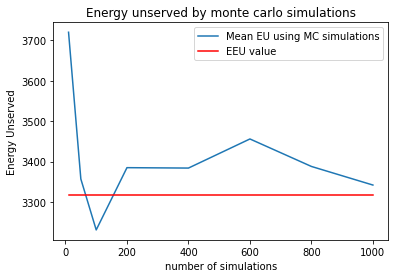

In [ ]:
#plot the mean EU in a year using different number of simulations.

import matplotlib.pyplot as plt
numofsim=[10,50,100,200,400,600,800,1000]
EEUmean_mc=[3720,3357,3231,3385,3384,3456,3388,3342]
EEUmean_real=[3316.2]*8


plt.plot(numofsim,EEUmean_mc,label='Mean EU using MC simulations')
plt.plot(numofsim,EEUmean_real,"r",label='EEU value')
plt.title('Energy unserved by monte carlo simulations')
plt.xlabel('number of simulations')
plt.ylabel('Energy Unserved')
plt.legend()
plt.show()

In [ ]:
ProbofnoEU=0
ProbofnoEU_20=0
ProbofnoEU_40=0
ProbofnoEU_60=0
ProbofnoEU_80=0
ProbofnoEU_200=0
for i in range(len(EUdis)):
    if(EUdis[i]==0):
        ProbofnoEU+=1
ProbofnoEU=ProbofnoEU/len(EUdis)
print('The probability of no shortfall in Year 2007-2008 is:', ProbofnoEU )

for i in range(len(EUdis_20)):
    if(EUdis_20[i]==0):
        ProbofnoEU_20+=1
ProbofnoEU_20=ProbofnoEU_20/len(EUdis_20)
print('The probability of no shortfall with 20% in Year 2007-2008 is:', ProbofnoEU_20 )

for i in range(len(EUdis_40)):
    if(EUdis_40[i]==0):
        ProbofnoEU_40+=1
ProbofnoEU_40=ProbofnoEU_40/len(EUdis_40)
print('The probability of no shortfall with 40% in Year 2007-2008 is:', ProbofnoEU_40 )

for i in range(len(EUdis_60)):
    if(EUdis_60[i]==0):
        ProbofnoEU_60+=1
ProbofnoEU_60=ProbofnoEU_60/len(EUdis_60)
print('The probability of no shortfall with 60% in Year 2007-2008 is:', ProbofnoEU_60 )

for i in range(len(EUdis_80)):
    if(EUdis_80[i]==0):
        ProbofnoEU_80+=1
ProbofnoEU_80=ProbofnoEU_80/len(EUdis_80)
print('The probability of no shortfall with 80% in Year 2007-2008 is:', ProbofnoEU_80 )
for i in range(len(EUdis_200)):
    if(EUdis_200[i]==0):
        ProbofnoEU_200+=1
ProbofnoEU_200=ProbofnoEU_200/len(EUdis_200)
print('The probability of no shortfall with 200% in Year 2007-2008 is:', ProbofnoEU_200 )

The probability of no shortfall in Year 2007-2008 is: 0.3607142857142857
The probability of no shortfall with 20% in Year 2007-2008 is: 0.443
The probability of no shortfall with 40% in Year 2007-2008 is: 0.5222857142857142
The probability of no shortfall with 60% in Year 2007-2008 is: 0.5925714285714285
The probability of no shortfall with 80% in Year 2007-2008 is: 0.6555714285714286
The probability of no shortfall with 200% in Year 2007-2008 is: 0.7083571428571429


In [ ]:
ProbofnoEU_EFC=0
for i in range(len(EUdis_EFC)):
    if(EUdis_EFC[i]==0):
        ProbofnoEU_EFC+=1
ProbofnoEU_EFC=ProbofnoEU_EFC/len(EUdis_EFC)

print('The probability of no shortfall (EFC=3050) is:', ProbofnoEU_EFC )

The probability of no shortfall (EFC=3050) is: 0.30742857142857144


In [ ]:
## Using Year 2007 as simulation


n=int(len(EUdis)/10)
up90=EUdis[len(EUdis)-n]

print('the 90th upper energy unserved is: ',  up90)
n_20=int(len(EUdis_20)/10)
up90_20=EUdis_20[len(EUdis_20)-n_20]

print('the 90th upper energy unserved with 20% is: ',  up90_20)
n_40=int(len(EUdis_40)/10)
up90_40=EUdis_40[len(EUdis_40)-n_40]

print('the 90th upper energy unserved with 40% is: ',  up90_40)

n_60=int(len(EUdis_60)/10)
up90_60=EUdis_60[len(EUdis_60)-n_60]

print('the 90th upper energy unserved with 20% is: ',  up90_60)

n_80=int(len(EUdis_80)/10)
up90_80=EUdis_80[len(EUdis_80)-n_80]

print('the 90th upper energy unserved with 80% is: ',  up90_80)

n_200=int(len(EUdis_200)/10)
up90_200=EUdis_200[len(EUdis_200)-n_200]

print('the 90th upper energy unserved with 20% is: ',  up90_200)

the 90th upper energy unserved is:  9935.489298166707
the 90th upper energy unserved with 20% is:  7363.975937011404
the 90th upper energy unserved with 40% is:  5528.0839370114045
the 90th upper energy unserved with 20% is:  4160.961506547406
the 90th upper energy unserved with 80% is:  3155.946363786592
the 90th upper energy unserved with 20% is:  2386.7420720719892


In [ ]:
n=int(len(EUdis)/10)
up90_EFC=EUdis_EFC[len(EUdis_EFC)-n]
print('the 90th upper energy unserved using EFC is: ', up90_EFC)

the 90th upper energy unserved using EFC is:  10259.486139629706


The probability of no shortfall is: 0.3607142857142857


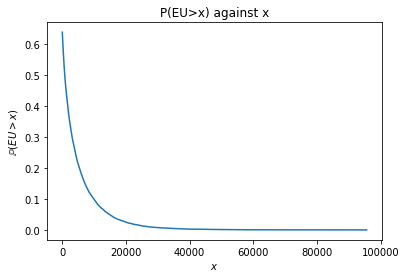

In [ ]:
import math
import matplotlib.pyplot as plt

x=EUdis
ProbofnoEU=0
for i in range(len(EUdis)):
    if(EUdis[i]==0):
        ProbofnoEU+=1
ProbofnoEU=ProbofnoEU/len(EUdis)

print('The probability of no shortfall is:', ProbofnoEU )

P=[0]*len(EUdis)
for i in range(len(EUdis)):
    if EUdis[i]==0:
        P[i]= 1-ProbofnoEU
    else:
        P[i]= 1/len(EUdis)*(len(EUdis)-i)


plt.plot(x,P)
plt.title('P(EU>x) against x')
plt.xlabel('$x$')
plt.ylabel('$\mathbb{P}(EU>x)$')
plt.show()

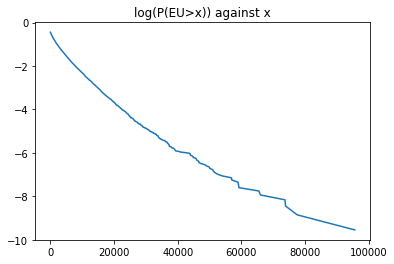

In [ ]:
x=EUdis
logP=[0]*len(EUdis)
for i in range(len(EUdis)):
    if EUdis[i]==0:
        logP[i]= math.log(1-ProbofnoEU)
    else:
        logP[i]=math.log(1/len(EUdis)*(len(EUdis)-i))
    
plt.plot(x,logP)
plt.title('log(P(EU>x)) against x')
plt.show()

In [ ]:
n=round(0.99*len(EUdis))
print(EUdis[n])
n_20=round(0.99*len(EUdis_20))
print(EUdis_20[n])

27428.18510583521
22114.006522522395


p value :  [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5, 0.55, 0.6, 0.65, 0.7, 0.75, 0.8, 0.85, 0.9, 0.95, 1.0]

VaR :   [27428.18510583521, 14810.529813017412, 9935.489298166707, 7138.768423423397, 5386.597067796603, 4104.785663314709, 3085.957145067099, 2320.5232366534983, 1699.854363786595, 1209.854363786595, 779.8543637865951, 452.78114883889066, 194.95893464560504, 0, 0, 0, 0, 0, 0, 0, 0]

CVaR :  [37859.64882558601, 23044.09800777979, 17532.636228163483, 14482.87210814609, 12412.798823154004, 10868.81678550297, 9655.313909665963, 8662.088190954952, 7828.833202641173, 7120.56262175395, 6506.2526402996245, 5970.279353496527, 5499.495473940257, 5082.12313959893, 4719.114343913292, 4404.506720985739, 4129.22505092413, 3886.329459693299, 3670.4222674881157, 3477.2421481466363, 3303.380040739304]
VaR 20% :   [22114.006522522395, 11219.825090079605, 7363.975937011404, 5058.915313067708, 3649.934072071992, 2674.440213268608, 1865.0695567774965, 1301.1512060999012, 893.996

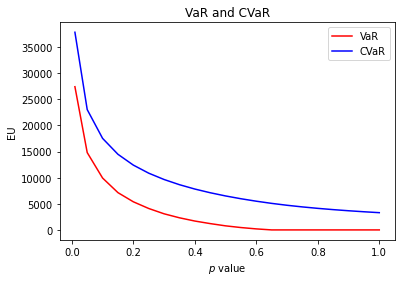

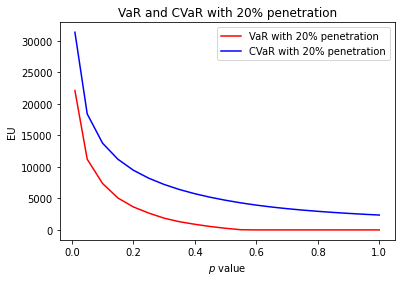

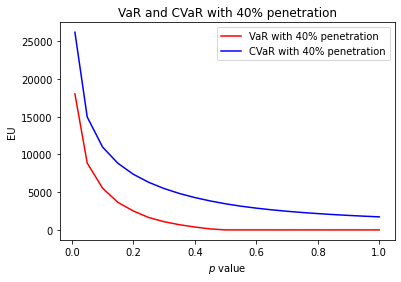

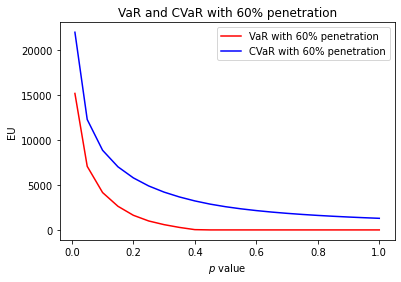

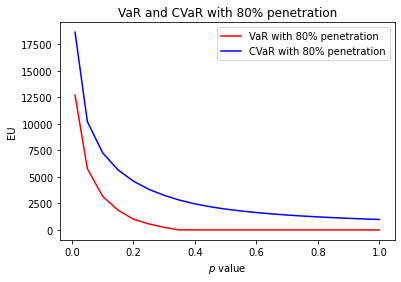

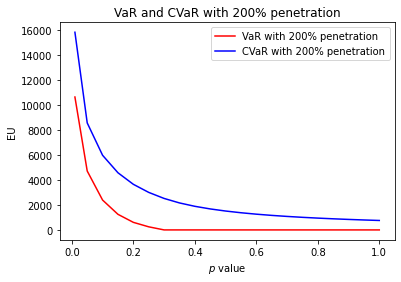

In [ ]:
#VaR (Economic calculation(Tailend risk))
x=[0.01]
k=[]
for i in range(1,21):
    x.append(5*i/100)
#x=[0.01,0.05,0.10,...,1]

VaR=[]
CVaR=[]
VaR_20=[]
CVaR_20=[]
VaR_40=[]
CVaR_40=[]
VaR_60=[]
CVaR_60=[]
VaR_80=[]
CVaR_80=[]
VaR_200=[]
CVaR_200=[]
for k in x:
    VaR.append(EUdis[int((1-k)*len(EUdis))])
    VaR_20.append(EUdis_20[int((1-k)*len(EUdis_20))])
    VaR_40.append(EUdis_40[int((1-k)*len(EUdis_40))])
    VaR_60.append(EUdis_60[int((1-k)*len(EUdis_60))])
    VaR_80.append(EUdis_80[int((1-k)*len(EUdis_80))])
    VaR_200.append(EUdis_200[int((1-k)*len(EUdis_200))])
    sum=0
    sum_20=0
    sum_40=0
    sum_60=0
    sum_80=0
    sum_200=0
    for j in range(int(k*len(EUdis))):
        sum+=EUdis[len(EUdis)-j-1]
        sum_20+=EUdis_20[len(EUdis_20)-j-1]
        sum_40+=EUdis_40[len(EUdis_40)-j-1]
        sum_60+=EUdis_60[len(EUdis_60)-j-1]
        sum_80+=EUdis_80[len(EUdis_80)-j-1]
        sum_200+=EUdis_200[len(EUdis_200)-j-1]
    CVaR.append(sum/int(k*len(EUdis)))
    CVaR_20.append(sum_20/int(k*len(EUdis_20)))
    CVaR_40.append(sum_40/int(k*len(EUdis_40)))
    CVaR_60.append(sum_60/int(k*len(EUdis_60)))
    CVaR_80.append(sum_80/int(k*len(EUdis_80)))
    CVaR_200.append(sum_200/int(k*len(EUdis_200)))

# for k in x:
#     VaR.append(EUdis[int((k)*len(EUdis))-1])
#     sum=0
#     for j in range(int(k*len(EUdis))):
#         sum+=EUdis[j]
#     CVaR.append(sum/int(k*len(EUdis)))
print('p value : ', x)
print('')
print('VaR :  ', VaR)
print('')
print('CVaR : ', CVaR)
print('VaR 20% :  ', VaR_20)
print('')
print('CVaR 20% : ', CVaR_20)
print('VaR 40% :  ', VaR_40)
print('')
print('CVaR 40% : ', CVaR_40)
print('VaR 40%:  ', VaR_60)
print('')
print('CVaR 60%: ', CVaR_60)
print('VaR 80%:  ', VaR_80)
print('')
print('CVaR 80% : ', CVaR_80)
print('VaR 200%:  ', VaR_200)
print('')
print('CVaR 200%: ', CVaR_200)
plt.plot(x,VaR,"r",label='VaR')
plt.plot(x,CVaR,"b",label='CVaR')
plt.title('VaR and CVaR')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.savefig("VaR and CVaR")
plt.legend()
plt.show()

plt.plot(x,VaR_20,"r",label='VaR with 20% penetration')
plt.plot(x,CVaR_20,"b",label='CVaR with 20% penetration')
plt.title('VaR and CVaR with 20% penetration')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.savefig("VaR and CVaR with 20% penetration")
plt.legend()
plt.show()

plt.plot(x,VaR_40,"r",label='VaR with 40% penetration')
plt.plot(x,CVaR_40,"b",label='CVaR with 40% penetration')
plt.title('VaR and CVaR with 40% penetration')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.savefig("VaR and CVaR with 40% penetration")
plt.legend()
plt.show()

plt.plot(x,VaR_60,"r",label='VaR with 60% penetration')
plt.plot(x,CVaR_60,"b",label='CVaR with 60% penetration')
plt.title('VaR and CVaR with 60% penetration')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.savefig("VaR and CVaR with 60% penetration")
plt.legend()
plt.show()

plt.plot(x,VaR_80,"r",label='VaR with 80% penetration')
plt.plot(x,CVaR_80,"b",label='CVaR with 80% penetration')
plt.title('VaR and CVaR with 80% penetration')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.savefig("VaR and CVaR with 80% penetration")
plt.legend()
plt.show()

plt.plot(x,VaR_200,"r",label='VaR with 200% penetration')
plt.plot(x,CVaR_200,"b",label='CVaR with 200% penetration')
plt.title('VaR and CVaR with 200% penetration')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.savefig("VaR and CVaR with 200% penetration")
plt.legend()
plt.show()

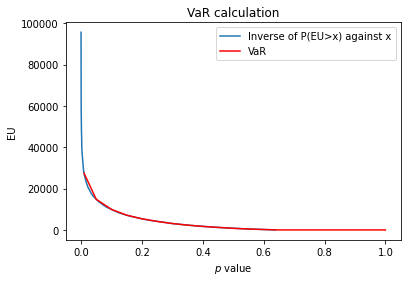

In [ ]:
#for checking
#inverse of P(EU>x) against x

plt.plot(P,EUdis,label='Inverse of P(EU>x) against x')
plt.plot(x,VaR,"r",label='VaR')
plt.title('VaR calculation')
plt.xlabel('$p$ value')
plt.ylabel('EU')
plt.legend()
plt.show()